In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline

In [54]:
# loading the training dataset
letters = pd.read_csv('train_1.csv')
letters

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827,1.828
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,14
1,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,0,0,0,1,...,1,1,0,0,0,1,1,1,1,12
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20
4,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,6
1192,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,6
1193,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [55]:
# getting the class column
y_train = letters.iloc[:,-1:]
y_train

,1.828
0,14
1,4
2,12
3,20
4,14
...,...
1191,6
1192,6
1193,1
1194,1


In [56]:
x_train = letters.iloc[:,:-1]
x_train

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.818,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1192,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
1193,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [57]:
test = pd.read_csv('test_with_label_1.csv')

In [58]:
x_test = test.iloc[:,:-1]

In [59]:
y_test = test.iloc[:,-1:]

Best-DT

In [192]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [193]:
# Creating a DecisionTreeClassifier
    
dec_tree = tree.DecisionTreeClassifier()

In [194]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth": [10,None],
    "min_samples_split":range(2,40,8),
    "min_impurity_decrease":[0.1,0.2,0.3],
    "class_weight":["balanced",None]
}

In [195]:
clf_GS = GridSearchCV(dec_tree,parameters)

In [196]:
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'min_impurity_decrease': [0.1, 0.2, 0.3],
                         'min_samples_split': range(2, 40, 8)})

In [197]:
# start printing the best parameters depending on Gridsearch

In [198]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])

Best Criterion: entropy


In [199]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best max_depth: 10


In [200]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['min_samples_split'])

Best max_depth: 2


In [201]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['min_impurity_decrease'])

Best max_depth: 0.1


In [202]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['class_weight'])

Best max_depth: None


In [68]:
# printing the tree
print(clf_GS.best_estimator_.get_params()[dec_tree])

KeyError: DecisionTreeClassifier()

In [203]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10,min_samples_split = 2, min_impurity_decrease = 0.1, class_weight = None)

In [204]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_impurity_decrease=0.1)

In [205]:
results = dec_tree.predict(x_test)

In [206]:
results

array([13, 13,  6,  2, 17, 11, 13, 13, 11, 13, 19, 11, 13, 19, 19,  6, 17,
        2, 10,  6,  6, 17, 17, 19, 17, 10, 11, 13, 13, 17, 10, 13,  6, 13,
       11,  2, 19,  6, 17, 13, 13, 13, 17, 10, 10, 13,  2, 11,  6, 10, 17,
       13, 11, 17,  6, 13, 19, 17,  2, 13,  6, 11, 10,  6, 13,  6, 11, 13,
       11, 13, 10, 11, 17, 13,  2, 17, 17,  6, 19], dtype=int64)

In [207]:
dec_tree.score(x_test,y_test)

0.17721518987341772

In [112]:
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00    

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
clf_GS.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [42]:
clf_GS.best_score_

0.4682357043235704

In [30]:
clf_GS.best_params_

{'criterion': 'entropy', 'max_depth': None}

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

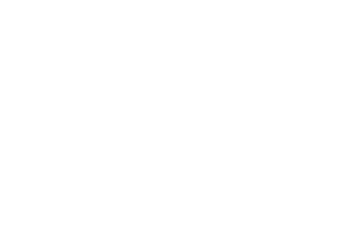

In [21]:
tree.plot_tree(clf_GS)